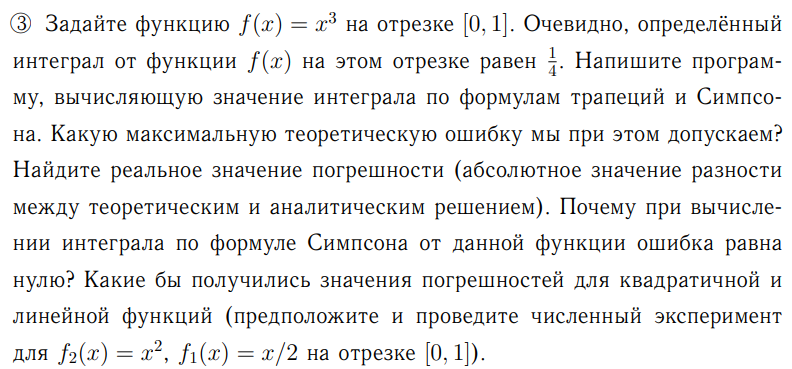

In [38]:
# Задание №1
import math
from sympy import diff

def f(x):
    return x**4

def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2
    for i in range(1, n):
        x = a + i * h
        integral += f(x)
    integral *= h
    return integral

def trapezoidal_error(a, b, n):
    h = (b - a) / n
    x_values = [a + i * h for i in range(n + 1)]
    
    # Вычисляем вторую производную функции
    f_double_prime = lambda x: 12*x**2  #============================ тут меняется значение производной
    f_double_prime_values = [f_double_prime(x) for x in x_values]
    
    # Находим максимальное значение второй производной
    max_f_double_prime = max(f_double_prime_values)
    
    # Вычисляем погрешность
    trap_error = -((b - a)**3) / (12 * n**2) * max_f_double_prime
    
    return trap_error

def simpsons_rule(a, b, n):
    h = (b - a) / n
    integral = f(a) + f(b)
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            integral += 2 * f(x)
        else:
            integral += 4 * f(x)
    integral *= h / 3
    return integral

def simpson_error(a, b, n):
    h = (b - a) / n
    x_values = [a + i * h for i in range(n + 1)]
    
    # Вычисляем четвёртую производную функции
    f_quadruple_prime = lambda x: 24  #============================ тут меняется значение производной
    f_quadruple_prime_values = [f_quadruple_prime(x) for x in x_values]
    
    # Находим максимальное значение четвёртой производной
    max_f_quadruple_prime = max(f_quadruple_prime_values)
    
    # Вычисляем погрешность
    symp_error = -((b - a)**5) / (180 * n**4) * max_f_quadruple_prime
    
    return symp_error

# Задаем значения начала и конца интервала интегрирования
a = 0
b = 1

# Задаем количество разбиений интервала
n = 100

# Вычисляем значения интеграла по формулам трапеций и Симпсона
trapezoidal_integral = trapezoidal_rule(a, b, n)
simpsons_integral = simpsons_rule(a, b, n)
trap_error = trapezoidal_error(a, b, n)
symp_error = simpson_error(a, b, n)

# Выводим результаты
print("Значение интеграла по формуле трапеций:", trapezoidal_integral)
print("Погрешность метода трапеций:", trap_error)
print("\n")
print("Значение интеграла по формуле Симпсона:", simpsons_integral)
print("Погрешность метода Симпсона:", symp_error)

Значение интеграла по формуле трапеций: 0.20003333300000006
Погрешность метода трапеций: -0.0001


Значение интеграла по формуле Симпсона: 0.20000000133333334
Погрешность метода Симпсона: -1.3333333333333333e-09


In [37]:
#Расчёт погрешности для задания №1
import sympy as sp

x = sp.symbols('x')
f = x**4

f_double_prime = sp.diff(f, x, 2)
f_quadruple_prime = sp.diff(f, x, 4)
print("Четвертая производная для погрешности м. трапеций: ", f_double_prime)
print("Четвертая производная для погрешности м. Симпсона: ", f_quadruple_prime)

Четвертая производная для погрешности м. трапеций:  12*x**2
Четвертая производная для погрешности м. Симпсона:  24


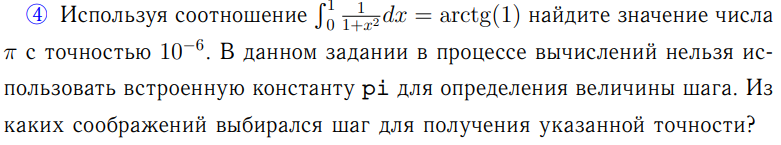

In [46]:
# Задание №2
import math

def calculate_pi(accuracy):
    n = 1
    previous_result = 0
    current_result = 0
    
    while True:
        h = 1/n
        current_result = sum([1/(1 + (i*h)**2) for i in range(n)]) * h
        
        if abs(current_result - previous_result) < accuracy:
            break
        
        previous_result = current_result
        n *= 2
    
    return current_result * 4

pi = calculate_pi(10**(-6))
print("Значение числа π с точностью 10^(-6):", pi)


Значение числа π с точностью 10^(-6): 3.1415964682846336


In [61]:
import math

def trapezoidal_rule(n):
    h = 1.0 / n
    sum = 0.0
    for i in range(1, n):
        x = i * h
        sum += 1 / (1 + x**2)
    integral = (h / 2) * (1 / (1 + 0**2) + 1 / (1 + 1**2) + 2 * sum)
    return integral

def calculate_pi(epsilon):
    n = 1
    previous_integral = trapezoidal_rule(n)
    current_integral = trapezoidal_rule(2 * n)
    while abs(current_integral - previous_integral) >= epsilon:
        n *= 2
        previous_integral = current_integral
        current_integral = trapezoidal_rule(2 * n)
    pi_approximation = 4 * current_integral
    return pi_approximation

epsilon = 1e-6
pi_approximation = calculate_pi(epsilon)
print("Аппроксимация π:", pi_approximation)


Approximation of π: 3.1415920178069214


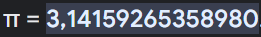

Поэтому приходится умножать интеграл на 4
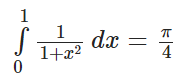

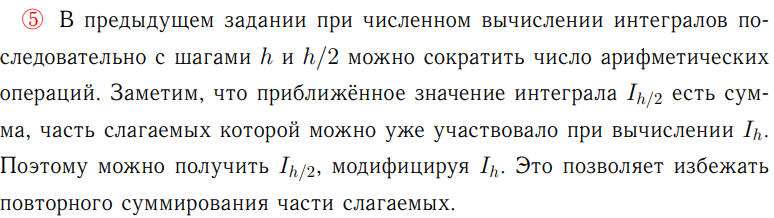

In [65]:
import math

def trapezoidal_rule(n, h):
    sum = 0.0
    for i in range(1, n):
        x = i * h
        sum += 1 / (1 + x**2)
    integral = (h / 2) * (1 / (1 + 0**2) + 1 / (1 + 1**2) + 2 * sum)
    return integral

def calculate_pi(epsilon):
    n = 1
    h = 1.0 / n
    previous_integral = trapezoidal_rule(n, h)
    current_integral = trapezoidal_rule(2 * n, h / 2)
    while abs(current_integral - previous_integral) >= epsilon:
        n *= 2
        h /= 2
        previous_integral = current_integral
        current_integral = trapezoidal_rule(2 * n, h / 2)
    pi_approximation = 4 * current_integral
    return pi_approximation

epsilon = 1e-6
pi_approximation = calculate_pi(epsilon)
print("Approximation of π:", pi_approximation)

#В функции calculate_pi, мы также обновляем значение h при увеличении
#количества разбиений, чтобы его использовать при вычислении интеграла с меньшим шагом.

#Таким образом, мы можем использовать уже вычисленные значения Ih для получения
#значения Ih/2, сокращая количество арифметических операций и улучшая 
#производительность программы

Approximation of π: 3.1415920178069214
